# Тестирование прямого и обратного fft без 2$\pi$

In [31]:
import numpy as np
from numpy import fft, pi, sqrt
from matplotlib import pyplot as plt

In [32]:
def make_rad_ifft(f_hat_xi, d):
    '''
    Вычисляет обратное преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_xi - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-pi/d, pi/d] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x, после того, как ifft отработает
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)

    '''
    dx = d
    M = len(f_hat_xi)

    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])

    f =  (1/(dx)) * sign_change_k * fft.ifft(fft.ifftshift(sign_change_l * f_hat_xi))
    return f

def make_rad_fft(f_x, d):
    '''
    Вычисляет преобразование Фурье без двух "пи" в показателе экспоненты
    
    Параметры:
    
    f_x - массив значений функции, задаваемый "как есть", без особенностей хранения
    и определённый на диапазоне [-M*dx/2, M*dx/2] в M = 2**N равноудалённых точках, без последней.
    
    d = dx - желаемый шаг по переменной x
    
    Области определения:
    
    xi_space = np.linspace( -pi/dx, pi/dx, num = M, endpoint = False)
    x_space = np.linspace( -M*dx/2, M*dx/2, num = M, endpoint = False)
    '''
    dx = d
    M = len(f_x)
    
    sign_change_k = np.array([(-1)**k for k in range(0, M)])
    sign_change_l = np.array([(-1)**l for l in range(0, M)])
    #учитываем порядок хранения
    sign_change_l = fft.fftshift(sign_change_l)

    f = sign_change_k * f_x
    f_hat = dx * sign_change_l * fft.fft(f)
    
    # избегаем особенностей хранения результатов fft, нам они не нужны.
    return fft.fftshift(f_hat)

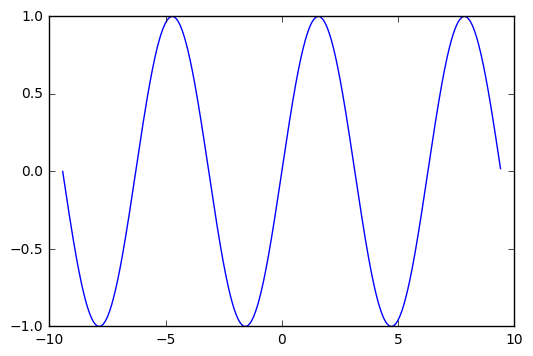

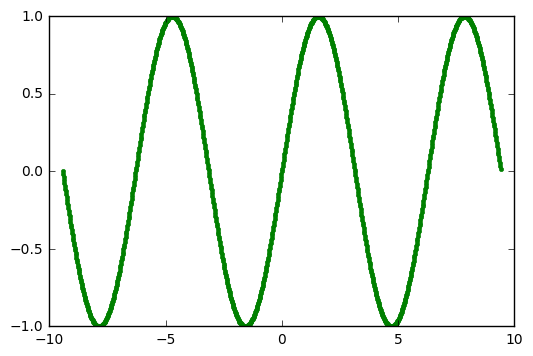

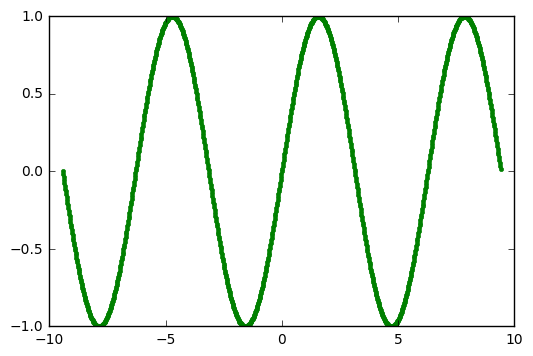

In [33]:
from numpy import sin

M = 2**10
x_space = np.linspace(-3*pi, 3*pi, num = M, endpoint=False)
dx = x_space[1]-x_space[0]

f = sin(x_space)

plt.plot(x_space, f)
plt.show()


f1 = make_rad_fft(make_rad_ifft(f, dx), dx)

# если обратное, потом прямое - нужен минус перед ответом
#f1 = -f1

plt.plot(x_space, f1.real, 'g.')
plt.show()

# plt.plot(x_space, f1.imag, 'r.')
# plt.show()

# если прямое, потом обратное - нужен знакочередующийся ряд
f2 = make_rad_ifft(make_rad_fft(f, dx), dx)
sign_change_k = np.array([(-1)**k for k in range(0, M)])
# f2 = sign_change_k * f2

plt.plot(x_space, f2.real, 'g.')
plt.show()

# plt.plot(x_space, f2.imag, 'r.')
# plt.show()
